<a href="https://colab.research.google.com/github/Hosein-Ghojavand/Farsi-English-SMS-Spam-Detection/blob/main/Farsi_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24

In [2]:
# ! pip install -U accelerate
# ! pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 9.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
import pandas as pd
import numpy as np
from datasets import  Dataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("/content/drive/MyDrive/NLP Files/final_dataset.csv", encoding='UTF-8')
df

,Text,Class
0,باید نهایتا ساعت ۶:۵۰ دقیقه از دم پل هوایی راه...,ham
1,قابل نداره جابجایی دوربین و تنظیم دستگاه دزدگی...,ham
2,سلام آقا مهدی من امشب هم نمیتونم بیام ، کلاس د...,ham
3,۳۰۰ هزار تومن تخفیف اولین استفاده از سرویس «اس...,spam
4,آفرVIPدبی6900 استانبول4800 ⭕تفلیس4800 ✅آنتالیا...,spam
...,...,...
1093,وارد بازارکار شو دوره کارآموزی آنلاین ورایگان ...,spam
1094,"""2 میلیون تخفیف کاشت مو،ابرو"" 🔷با رعایت پروتکل...",spam
1095,۳ برابر شانس بیشتر با خرید شارژ 💥 فقط امروز دو...,spam
1096,ایرانسلی عزیز 💛، بدون پرداخت هزینه آنی مکالمه ...,spam


In [5]:
# Convert labels to binary
df['label'] = df['Class'].map({'ham': 0, 'spam': 1})

In [6]:
# Check for missing values
missing_values = df.isna().sum()
if missing_values.any():
    print("Found missing values. Removing them...")
    df = df.dropna()

Found missing values. Removing them...


In [7]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
# Convert back to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [9]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    # Tokenize the texts
    tokenized = tokenizer(
        examples["Text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )
    # Add labels to the tokenized output
    tokenized["labels"] = examples["label"]
    return tokenized

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [10]:
# Apply tokenization to our datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/876 [00:00<?, ? examples/s]

Map:   0%|          | 0/220 [00:00<?, ? examples/s]

In [11]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [12]:
from transformers import DataCollatorWithPadding

In [13]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",
    per_device_train_batch_size=16,  # Increase batch size if memory allows
    per_device_eval_batch_size=16,
    num_train_epochs=2,  # Reduce number of epochs for quicker training
    weight_decay=0.01,
    fp16=True,  # Enable mixed precision training
)



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
import accelerate
import transformers
transformers.__version__, accelerate.__version__

('4.42.4', '0.32.1')

In [15]:

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.443635,0.781818,0.803279,0.924528,0.710145
2,No log,0.379997,0.845455,0.862903,0.972727,0.775362


TrainOutput(global_step=110, training_loss=0.445215537331321, metrics={'train_runtime': 23.4039, 'train_samples_per_second': 74.859, 'train_steps_per_second': 4.7, 'total_flos': 115242642247680.0, 'train_loss': 0.445215537331321, 'epoch': 2.0})

{'eval_loss': 0.3799966871738434, 'eval_accuracy': 0.8454545454545455, 'eval_f1': 0.8629032258064516, 'eval_precision': 0.9727272727272728, 'eval_recall': 0.7753623188405797, 'eval_runtime': 0.5153, 'eval_samples_per_second': 426.925, 'eval_steps_per_second': 27.168, 'epoch': 2.0}


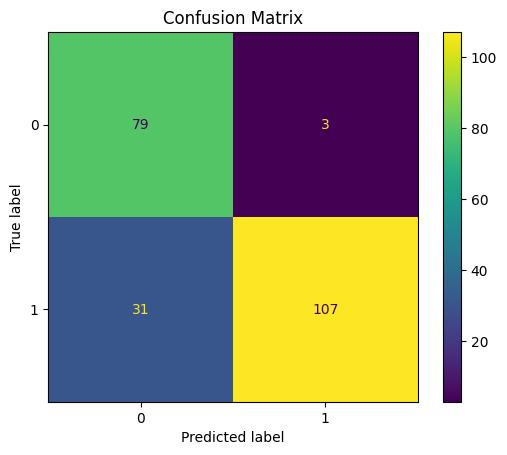

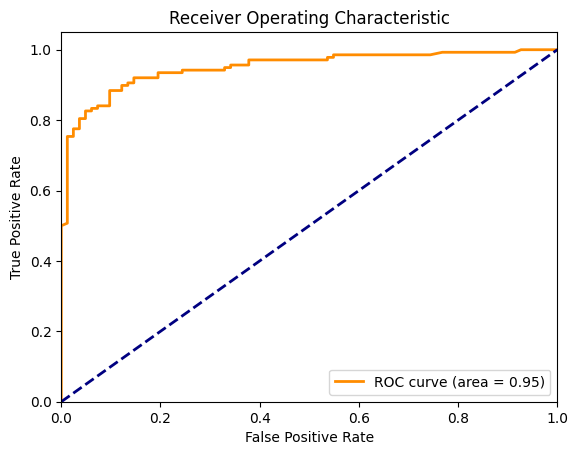

Sensitivity: 0.7753623188405797
Specificity: 0.9634146341463414


In [16]:
# Evaluate the model
evaluation = trainer.evaluate()
print(evaluation)

# Get predictions on the test set
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc
import numpy as np

y_pred_proba = predictions.predictions[:, 1]
fpr, tpr, _ = roc_curve(labels, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Sensitivity and Specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')